# Projeto - Machine Learning I

### Prof.
### Membros do grupo

## Enunciado

Neste módulo, vamos fazer um estudo de caso para práticar a análise dos resultados de um projeto de machine learning, você deverá se reunir em um grupo com de 4 a 5 pessoas e seguir o passo a passo abaixo.

- Escolher um Dataset, valide com o professor se o dataset escolhido é valido :heavy_check_mark:

- Definir uma aplicação de Machine Learning para aplicar ao Dataset: escolhemos como variável dependente (target) a qualidade do sono por meio de classificação

   a. Esta aplicação pode ser uma regressão ou uma classificação para predizer um target a sua escolha.

- Fazer a análise com pelo menos 2 estimadores, comparando os resultados

- Fazer a otimização dos hiperparâmetros, utilizando a metodologia da preferência do grupo

- Fazer a discussão de se o modelo está bom o suficiente para ser aplicado em produção, resolvendo o problema formulado no início

A avaliação sera feita em uma apresentação, com o grupo apresentando e discutindo a metodologia de tratamento dos dados e os resultados obtidos. Pede-se que cada grupo preencha na planilha o dataset escolhido.

## Dataset


Disponível em: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

### Metadados

- Person ID: Identificador para cada indivíduo.
- Gender: Gênero de cada pessoa (Feminino/Masculino)
- Age: Idade da pessoa em anos.
- Occupation: Ocupação ou profissão da pessoa.
- Sleep Duration (hours): Número de horas que a pessoa dorme por dia.
- **Quality of Sleep** (scale: 1-10): Nota subjetiva de qualidade do sono entre 1 e 10.
- Physical Activity Level (minutes/day): Número de minutos que a pessoa realiza atividades físicas diariamente.
- Stress Level (scale: 1-10): Nota subjetiva de nível de stress vivida pela pessoa entre 1 e 10.
- BMI Category: Categoria do IMC de cada pessoa(e.g., ||The BMI category of the person (e.g., Normal, Sobrepeso, Obesidade).
- Blood Pressure (systolic/diastolic): Medição da pressão sanguínea de cada pessoa, indicada por pressão sistólica sobre pressão diastólica.
- Heart Rate (bpm): Batimento cardíaco da pessoa enquanto descansada.
- Daily Steps: Número de passos dados pela pessoa por dia.
- Sleep Disorder: Presença ou falta de uma desordem de sono na pessoa (Nenhuma, Insônia, Apnéia do sono).

## Importações

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate

## Investigação inicial do dataset

In [49]:
df = pd.read_csv("sleep.csv")

In [50]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [52]:
df.shape

(374, 13)

In [53]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [54]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [55]:
df.duplicated().sum()

0

In [56]:
df['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [57]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

## Ajuste inicial de dados

In [58]:
df2 = df.copy(deep=True)

In [59]:
df2['Gender'] = df2['Gender'].map({'Male':0, 'Female': 1})

In [60]:
df2['BMI Category'] = df2['BMI Category'].map({'Normal Weight': 'Normal', 'Normal':'Normal', 'Obese': 'Obese', 'Overweight': 'Overweight'})

In [61]:
# calculo da pressão arterial media (MAP):
# MAP = (sistolica + 2x diastolica)/3
#normal = abaixo de 90
#elevado = entre 90 e 92
#hipertensão 1 = entre 92 e 96
#hipertensão 2 = acima de 96

#Separando a coluna "Blood Pressure" (Pressão Sanguínea) em pressões sistólica e diastólica
systolic = df['Blood Pressure'].apply(lambda x: x.split('/')[0]).apply(lambda x: int(x))
diastolic = df['Blood Pressure'].apply(lambda x: x.split('/')[1]).apply(lambda x: int(x))

map = []
for measure in range(len(systolic)):
  map.append(round((systolic[measure] + (2*diastolic[measure]))/3,1))

df2['MAP'] = map

## Visualização dos dados

Vamos investigar como se comportam as distribuições dos parâmetros do dataset

### Duração do Sono

<Axes: xlabel='Sleep Duration', ylabel='Count'>

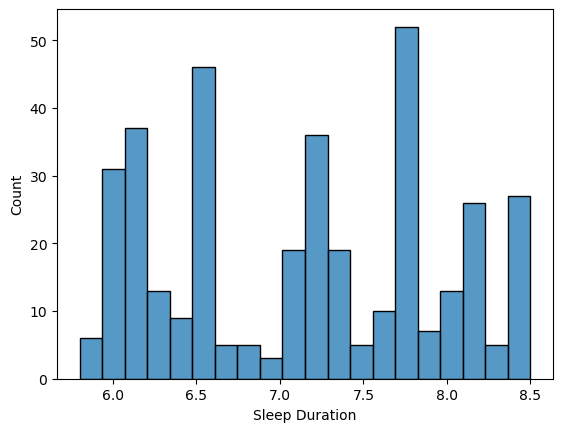

In [62]:
sns.histplot(df2, x="Sleep Duration", bins=20)

### Qualidade do Sono

<Axes: xlabel='Quality of Sleep', ylabel='Count'>

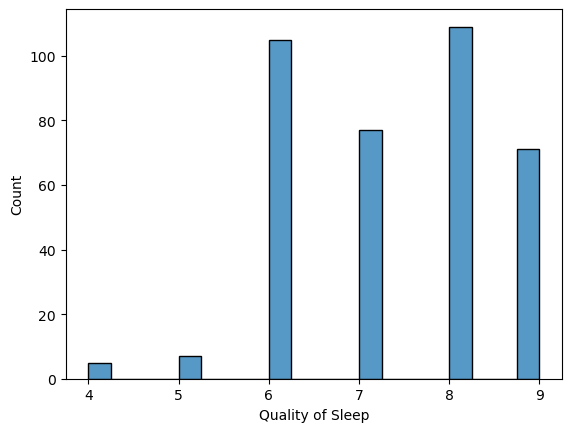

In [63]:
sns.histplot(df2, x="Quality of Sleep", bins=20)

<Axes: xlabel='Quality of Sleep'>

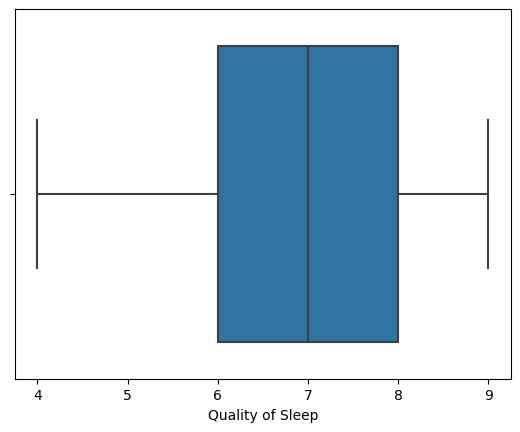

In [64]:
sns.boxplot(df2, x="Quality of Sleep")

### Nível de atividade física

<Axes: xlabel='Physical Activity Level', ylabel='Count'>

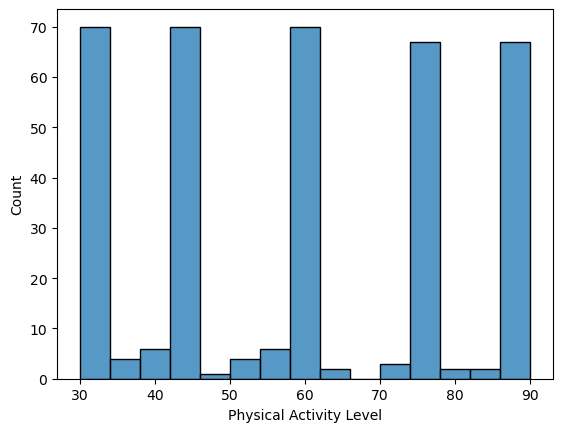

In [65]:
sns.histplot(df2, x="Physical Activity Level", bins=15)

### Nível de Stress

<Axes: xlabel='Stress Level', ylabel='Count'>

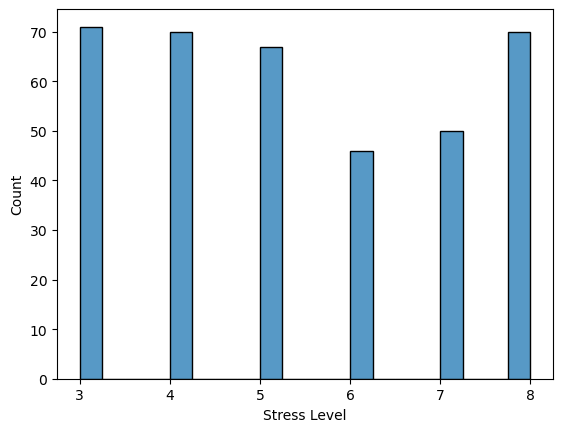

In [66]:
sns.histplot(df2, x="Stress Level", bins=20)

### Categoria do IMC

<Axes: xlabel='BMI Category', ylabel='Count'>

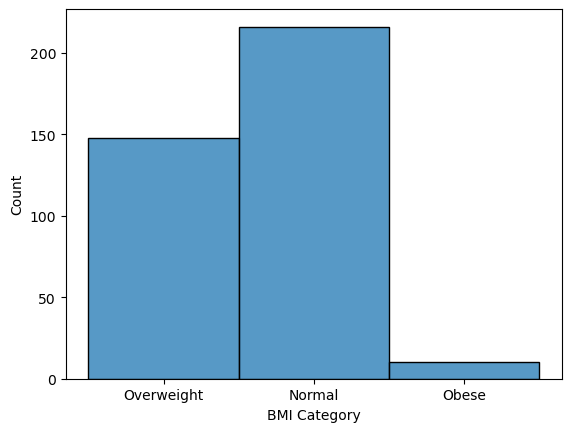

In [67]:
sns.histplot(df2, x="BMI Category", bins=20)

### Batimento Cardíaco

<Axes: xlabel='Heart Rate', ylabel='Count'>

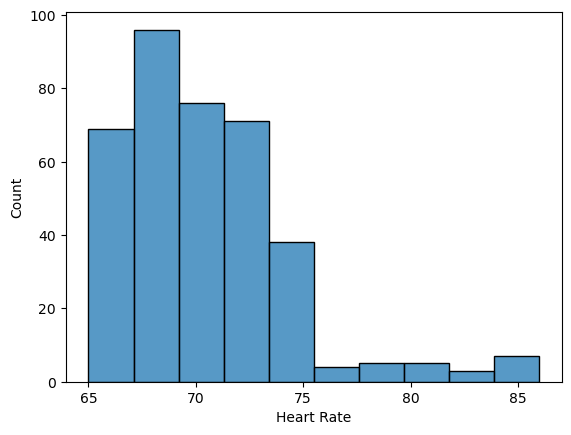

In [68]:
sns.histplot(df2, x="Heart Rate", bins=10)

### Passos Diários

<Axes: xlabel='Daily Steps', ylabel='Count'>

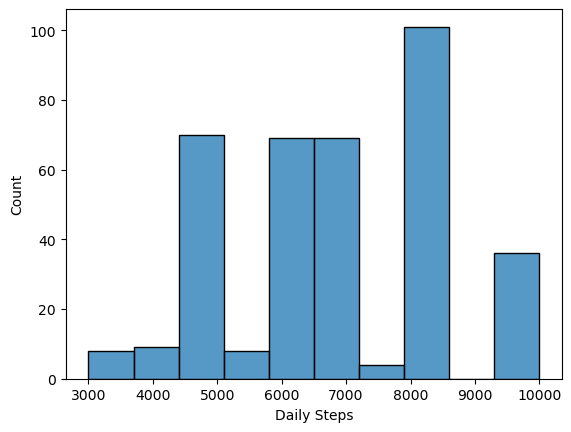

In [69]:
sns.histplot(df2, x="Daily Steps", bins=10)

### Desordem de Sono

<Axes: xlabel='Sleep Disorder', ylabel='Count'>

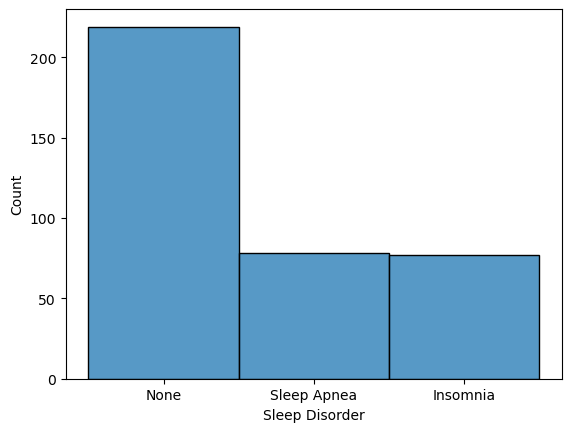

In [70]:
sns.histplot(df2, x="Sleep Disorder", bins=20)

### Distribuições relacionais par a par

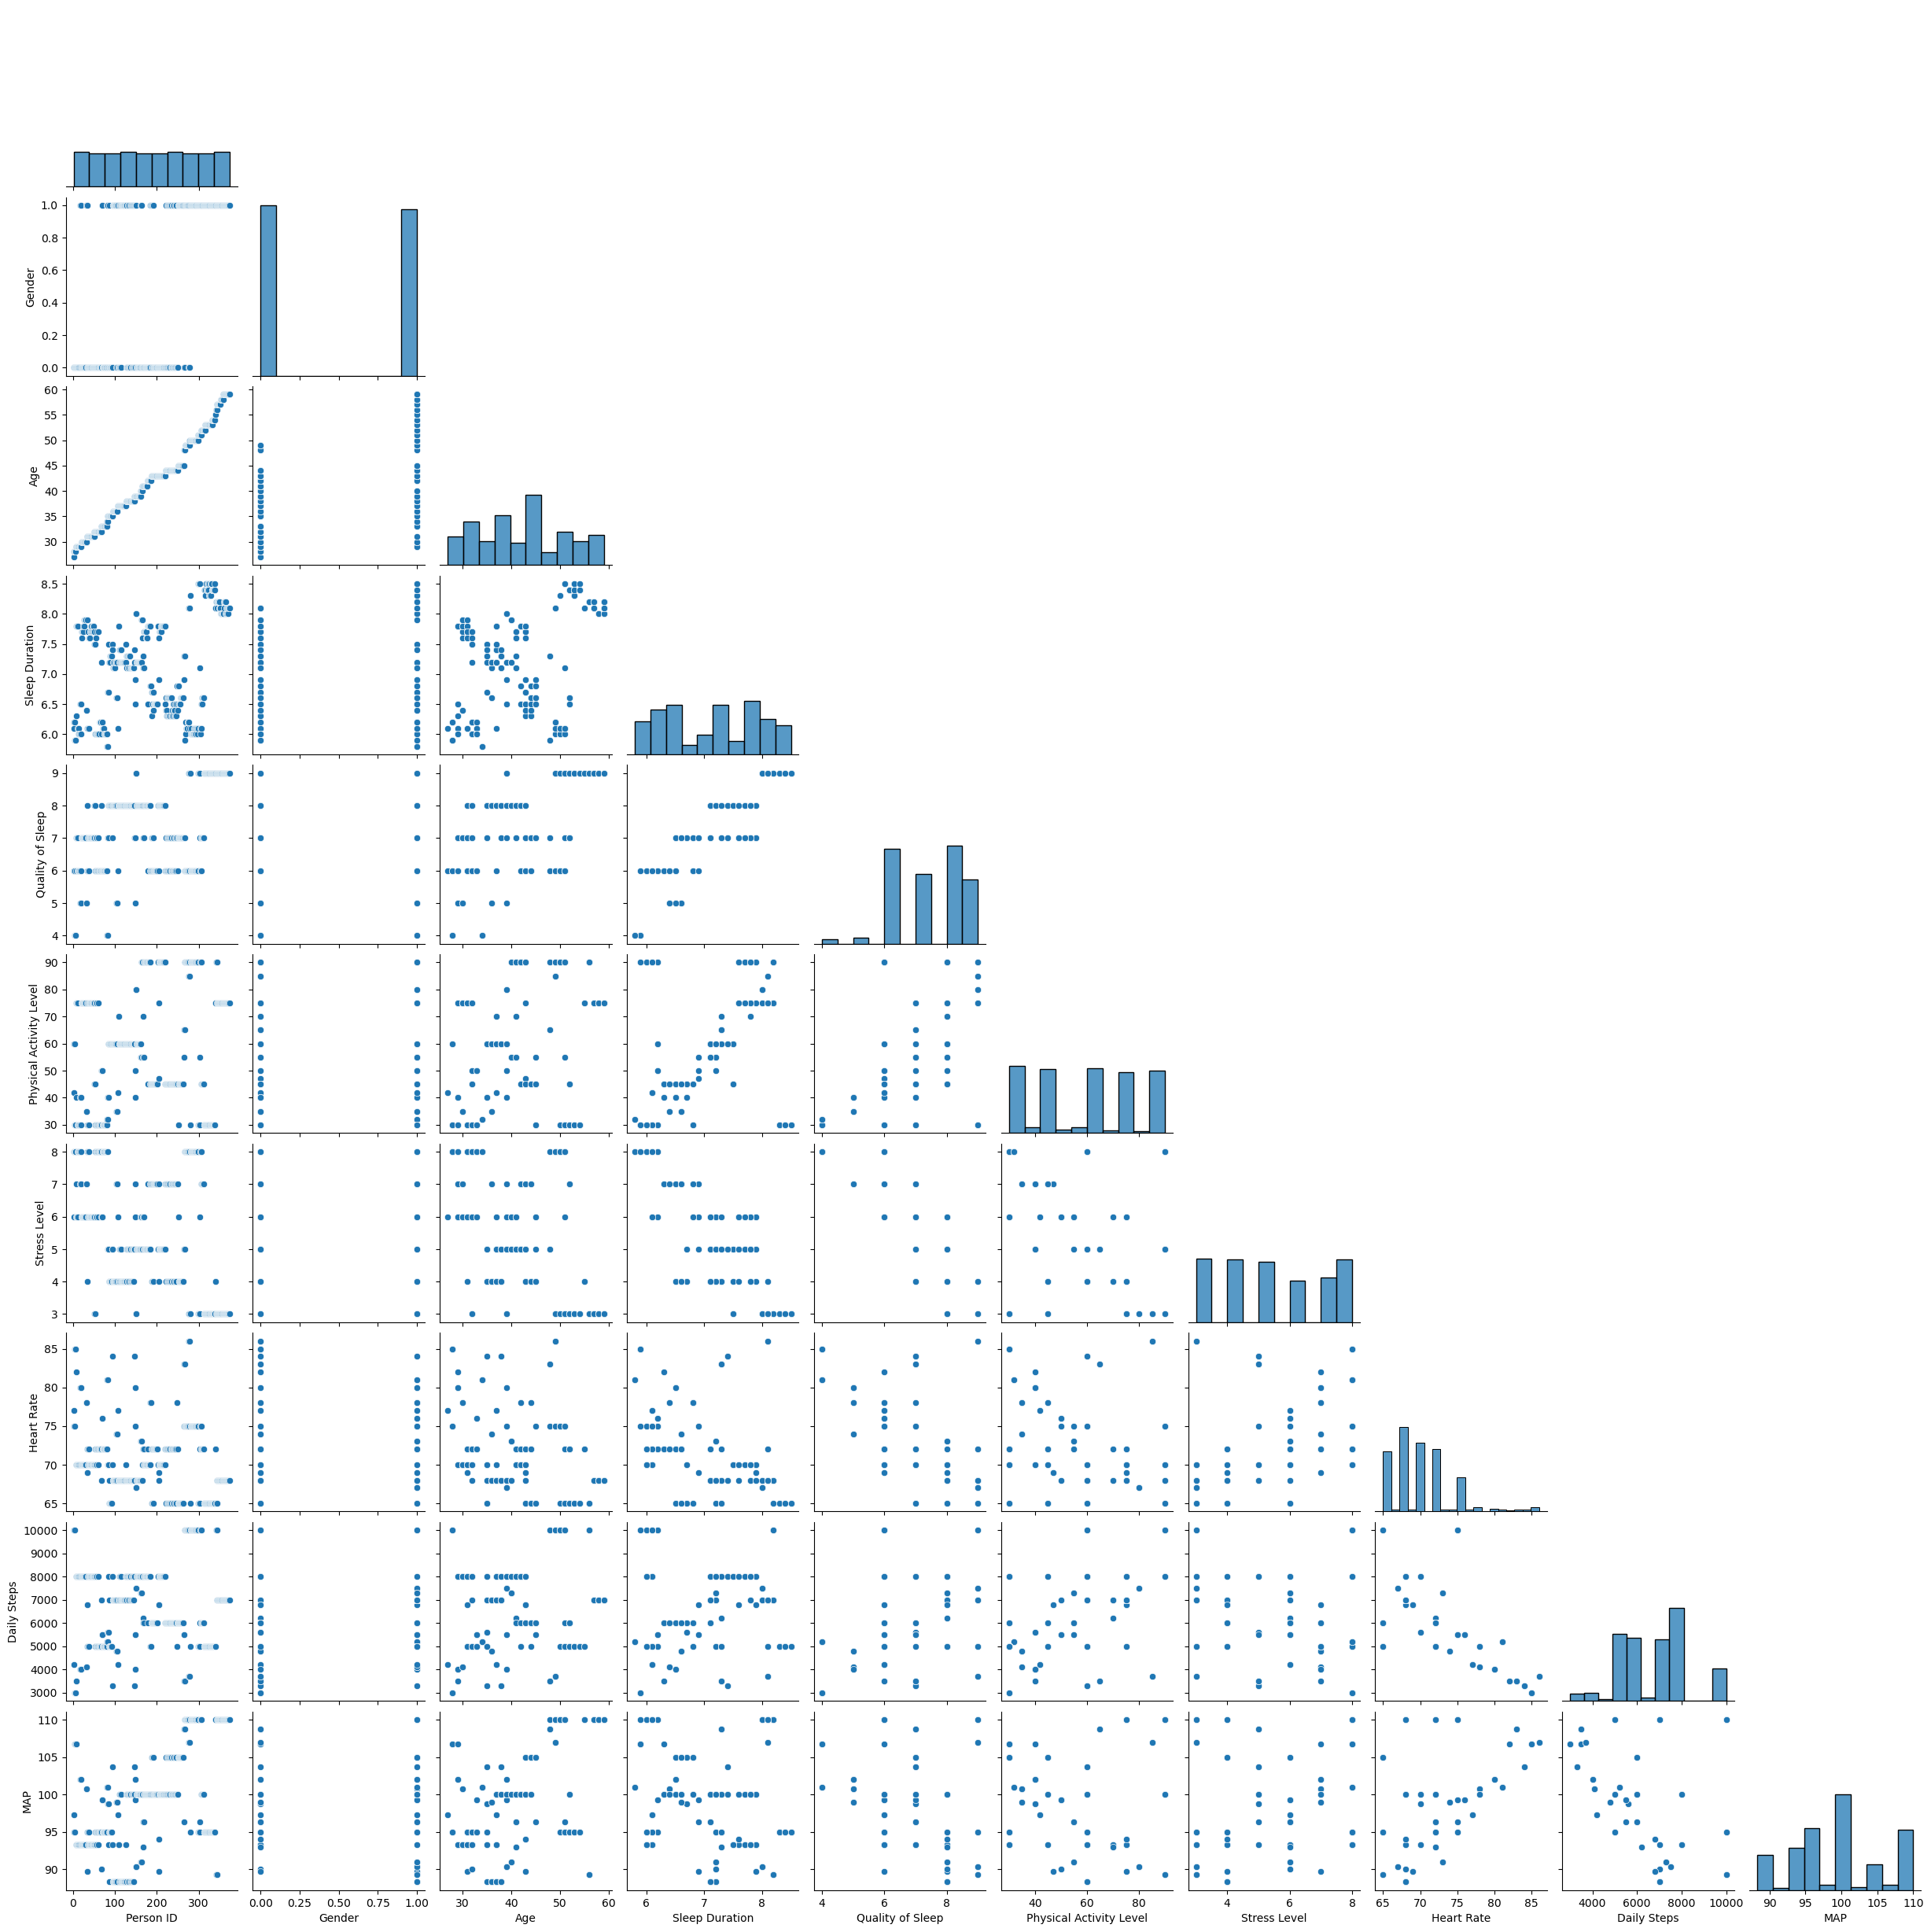

In [71]:
sns.pairplot(df2, corner=True)

## Transformações

### Variável dependente (Target)

<Axes: xlabel='Quality of Sleep', ylabel='Count'>

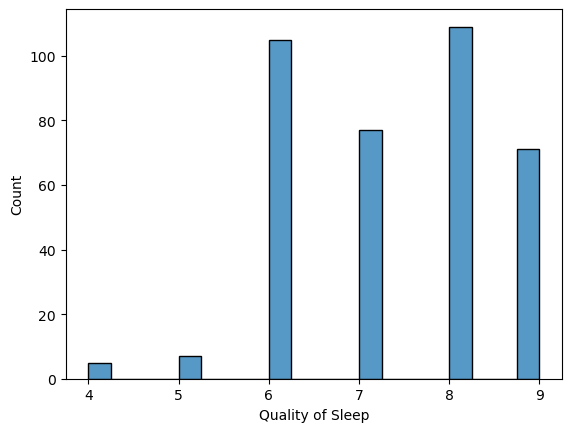

In [72]:
sns.histplot(df2, x='Quality of Sleep', bins=20)

In [73]:
df2['Quality of Sleep_bin'] = df2['Quality of Sleep'].apply(lambda x : 1 if x > 7 else 0)

<Axes: xlabel='Quality of Sleep_bin', ylabel='Count'>

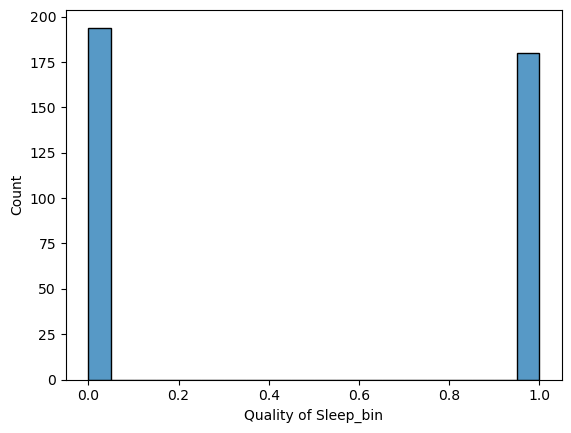

In [74]:
sns.histplot(df2, x='Quality of Sleep_bin', bins=20)

Em vez de nota, separamos em bom (1) e ruim (0). A separação foi baseada na busca por um equilíbrio maior entre as categorias

### Variaveis Independentes (parâmetros)

#### Categoria de IMC

In [75]:
df2 = pd.get_dummies(df2, columns=["BMI Category"], prefix="BMI Category", drop_first=True)

#### Desordem de Sono

In [76]:
df2 = pd.get_dummies(df2, columns=["Sleep Disorder"], prefix="Sleep Disorder")

In [77]:
df2.drop(columns="Sleep Disorder_None", axis=1, inplace=True)

## Ajustes prévios à modelagem

In [78]:
df2.drop(columns=["Person ID",'Occupation', "Quality of Sleep", 'Blood Pressure'], axis=1, inplace=True)

## Análise de correlações

<Axes: >

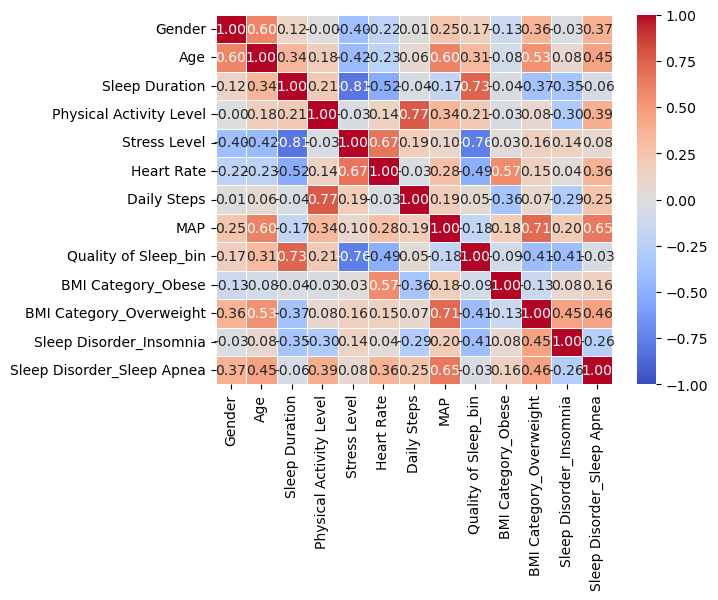

In [79]:
sns.heatmap(df2.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f')

baseados no heatmap, faz sentido droparmos:
- Daily Steps ( multicolinearidade com "Physical Activity Level", que explica melhor)
- Sleep Disorder_Apnea (multicolinearidade com "Mean Arterial Pressure", que explica melhor)

(https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

In [80]:
df2.drop(columns=["Daily Steps", "Sleep Disorder_Sleep Apnea"], axis=1, inplace=True)

<Axes: >

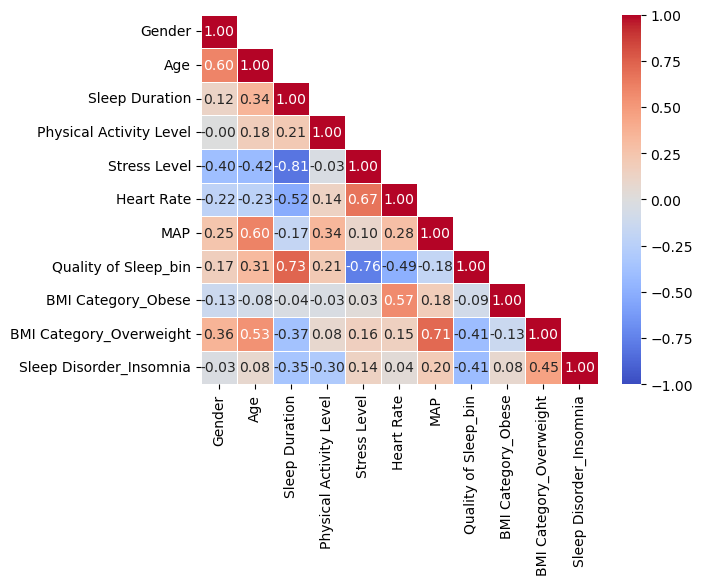

In [81]:
mask = np.triu(df2.corr())
np.fill_diagonal(mask, False)
sns.heatmap(df2.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f', mask=mask)

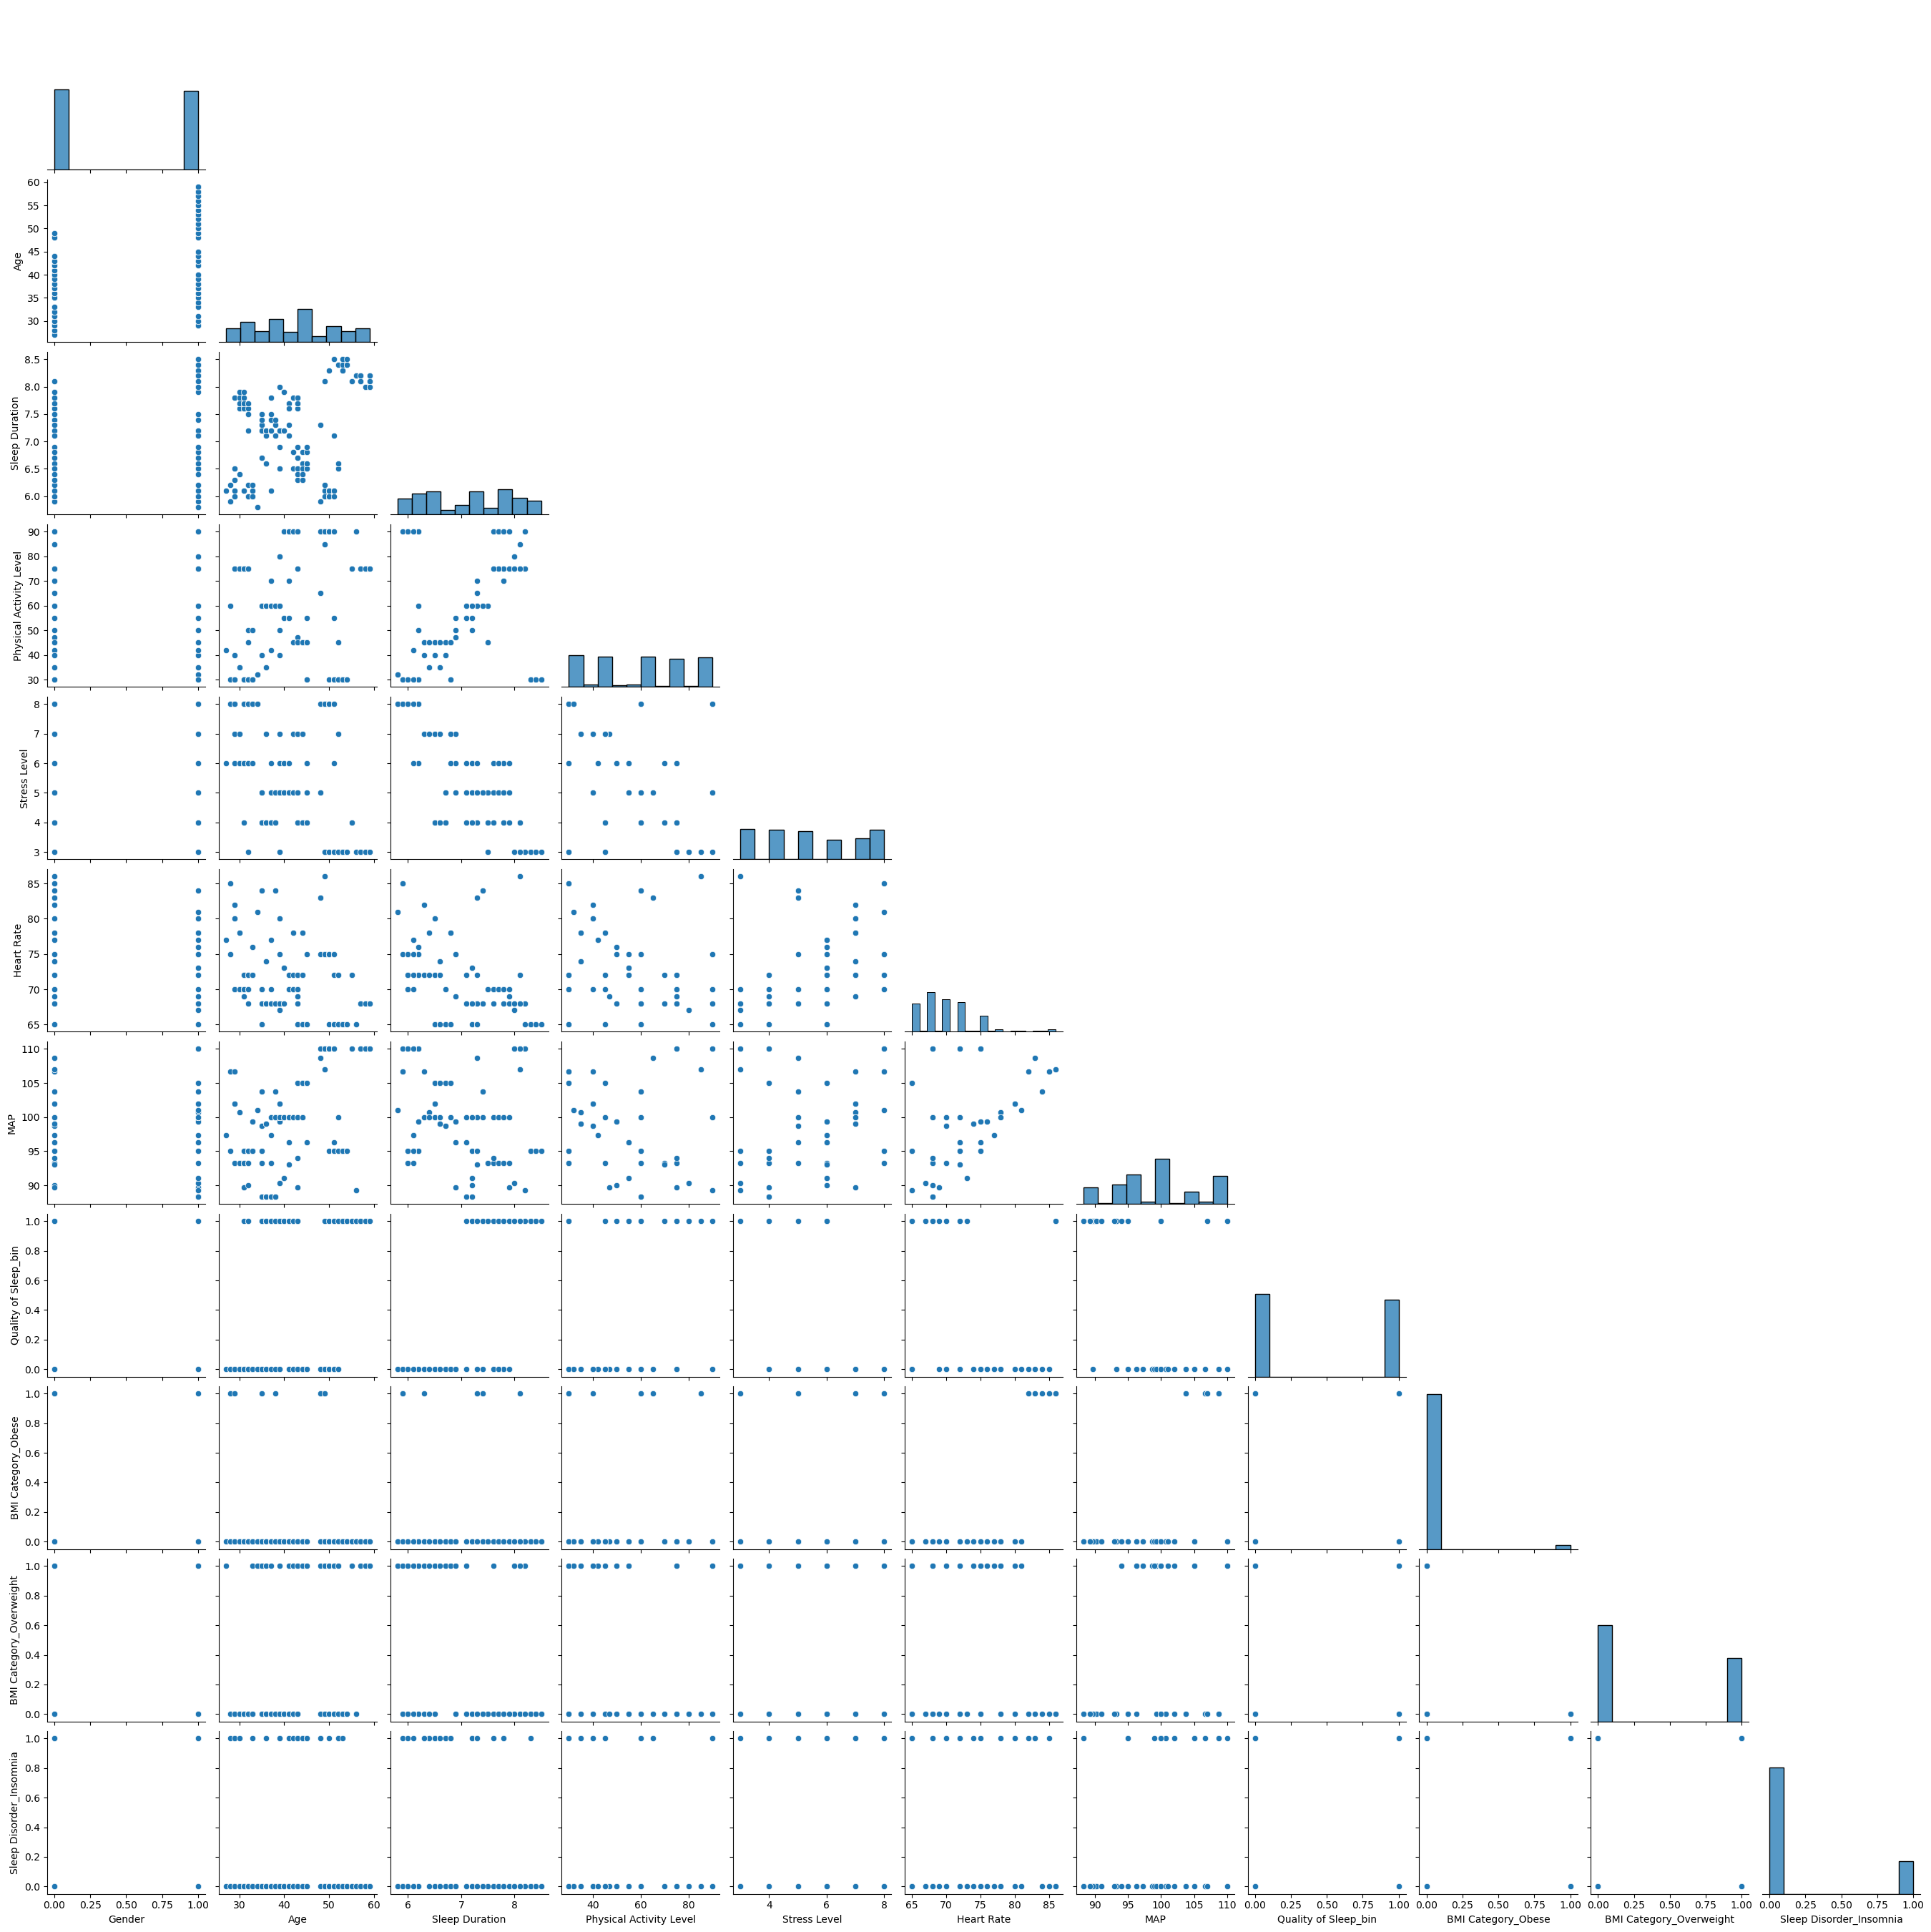

In [82]:
sns.pairplot(df2, corner=True)

In [83]:
df2.shape

(374, 11)

In [84]:
df2.head(20)

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,MAP,Quality of Sleep_bin,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia
0,0,27,6.1,42,6,77,97.3,0,0,1,0
1,0,28,6.2,60,8,75,95.0,0,0,0,0
2,0,28,6.2,60,8,75,95.0,0,0,0,0
3,0,28,5.9,30,8,85,106.7,0,1,0,0
4,0,28,5.9,30,8,85,106.7,0,1,0,0
5,0,28,5.9,30,8,85,106.7,0,1,0,1
6,0,29,6.3,40,7,82,106.7,0,1,0,1
7,0,29,7.8,75,6,70,93.3,0,0,0,0
8,0,29,7.8,75,6,70,93.3,0,0,0,0
9,0,29,7.8,75,6,70,93.3,0,0,0,0


## Modelagem

### Regressão Logística (Baseline) **** ATENÇÃO ****

TIVE QUE FAZER ISSO AQUI, POIS ESTAVA HAVENDO VAZAMENTO DE DADOS POR CAUSA DE DADOS DUPLICADOS APÓS AS MODIFICAÇÕES

In [85]:
df3 = df2.copy(deep=True)
df3.drop_duplicates(inplace=True)

In [86]:
df3.shape

(120, 11)

#### Separando em Target e Features

In [98]:
x_col = ['Gender', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'MAP', 'Quality of Sleep_bin', 'BMI Category_Obese', 'BMI Category_Overweight', 'Sleep Disorder_Insomnia']
y_col = ['Quality of Sleep_bin']

X = df3[x_col]
y = df3[y_col]

#### Separando dados de treino e teste

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

#### Criando modelo

In [95]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

c:\Users\julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Averiguando métricas

In [96]:
modelo.score(X_test, y_test)

1.0

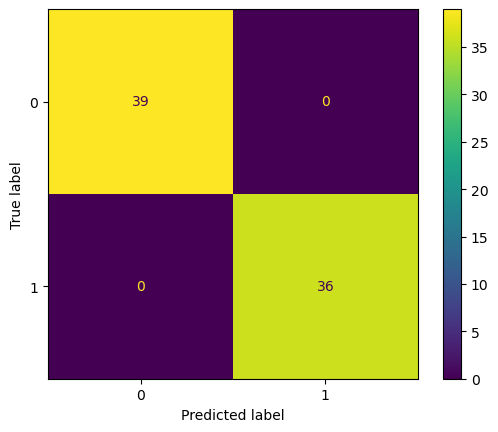

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Cross validation

In [106]:
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

results_cv = cross_validate(estimator=modelo, X=X_train, y=y_train,
                           cv=kf5, scoring="f1",
                           return_train_score=True, return_estimator=True)

In [107]:
df_results_cv = pd.DataFrame(results_cv)

In [108]:
df_results_cv.head()

,fit_time,score_time,estimator,test_score,train_score
0,0.015014,0.003511,LogisticRegression(),1.000000,1.0
1,0.012132,0.003999,LogisticRegression(),0.982456,1.0
2,0.017291,0.004544,LogisticRegression(),0.981132,1.0
3,0.014096,0.002458,LogisticRegression(),1.000000,1.0
4,0.013325,0.003000,LogisticRegression(),1.000000,1.0


### Estimadores selecionados:
- regressão logística (baseline)
- KNN
- Árvore de decisões